In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture 

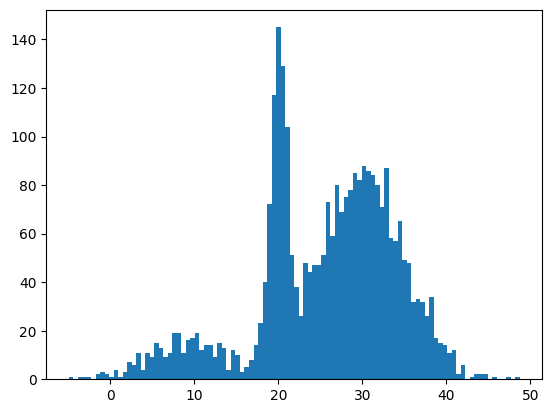

In [2]:
data=np.load('formationchannels.npy')

plt.hist(data, bins=100)
plt.show()

In [16]:
gm=GaussianMixture(n_components=3, random_state=0).fit(data)
gm.score(data) 


np.float64(-3.4012388398828977)

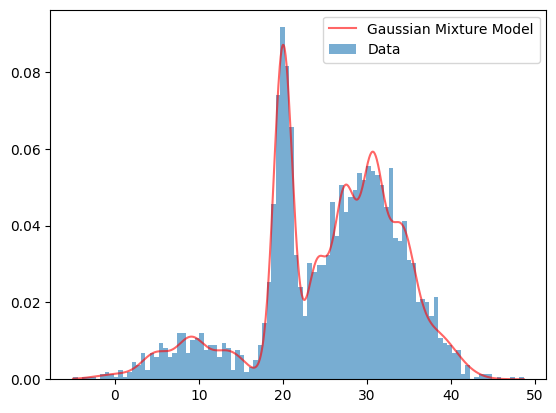

In [19]:
x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
pdf = np.exp(gm.score_samples(x))
plt.plot(x.ravel(), pdf, '-r', label="Gaussian Mixture Model", alpha=0.6) 
plt.hist(data, bins=100, density=True, alpha=0.6, label="Data")
plt.legend()
plt.show()

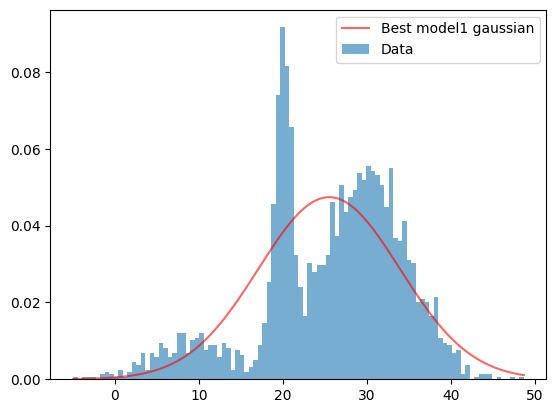

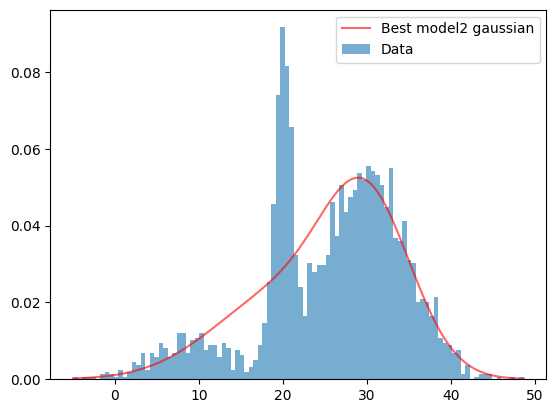

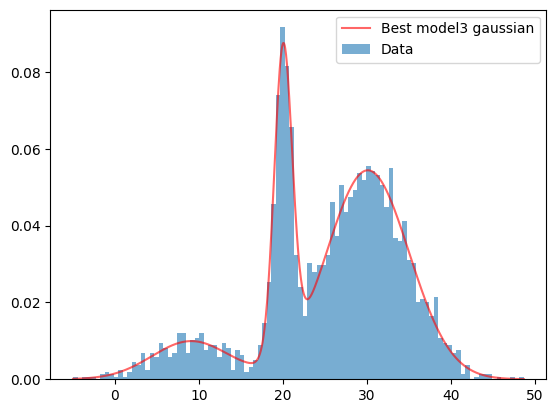

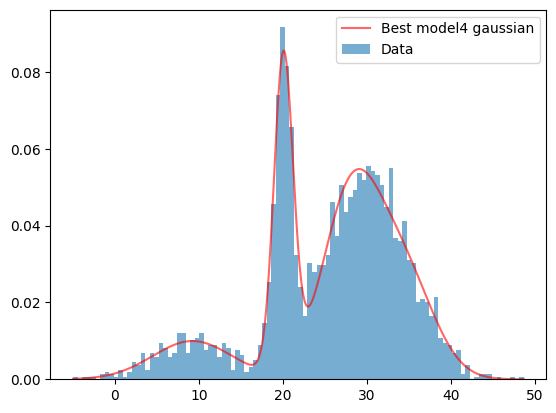

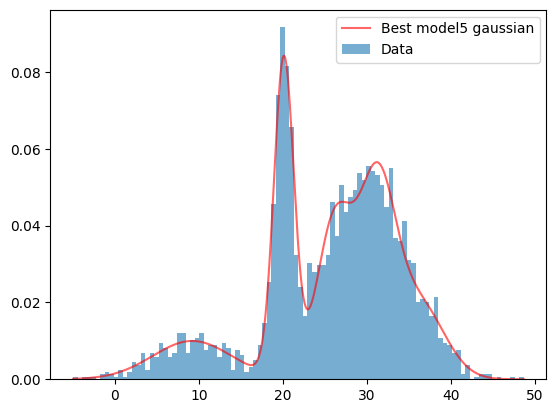

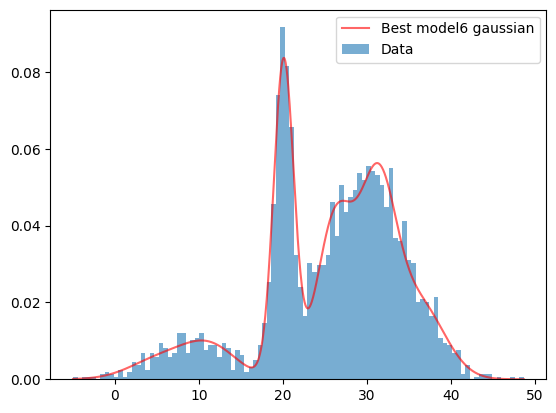

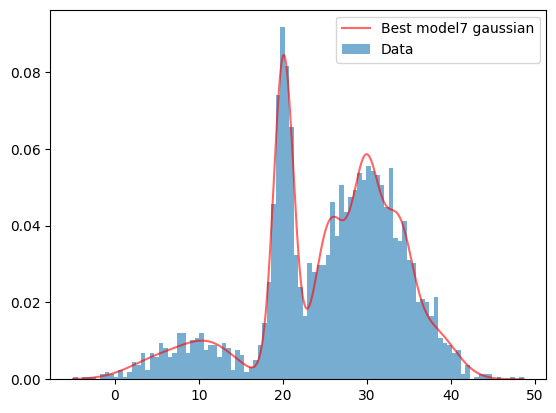

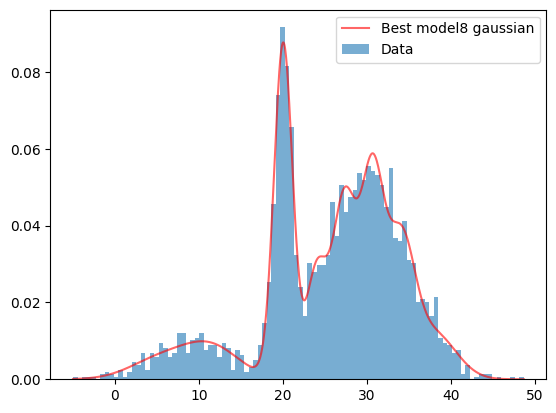

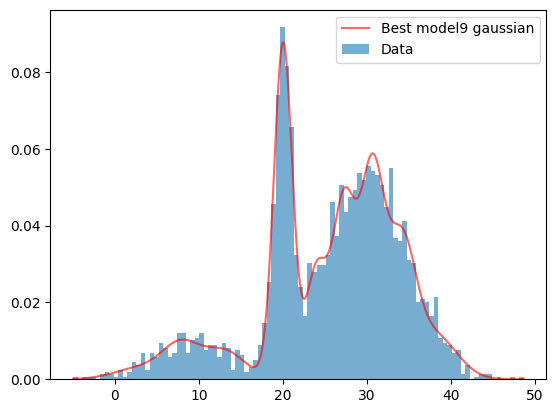

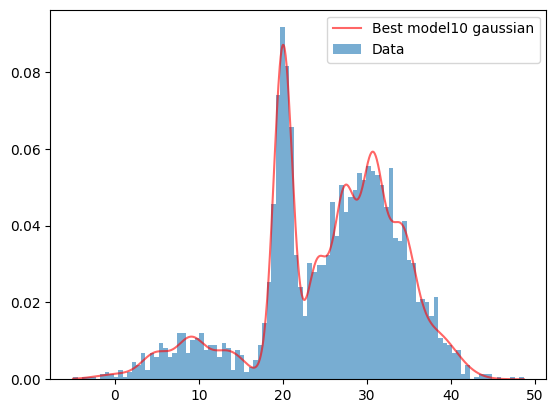

In [24]:
AIC=[]
for i in range (10):
    gm=GaussianMixture(n_components=i+1, random_state=0)
    gm.fit(data)
    AIC.append(gm.aic(data))
    x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
    pdf = np.exp(gm.score_samples(x))
    plt.plot(x.ravel(), pdf, '-r', alpha=0.6, label=f"Best model{i+1} gaussian")
    plt.hist(data, bins=100, density=True, alpha=0.6, label="Data")
    plt.legend()
    plt.show()
    plt.close()
    

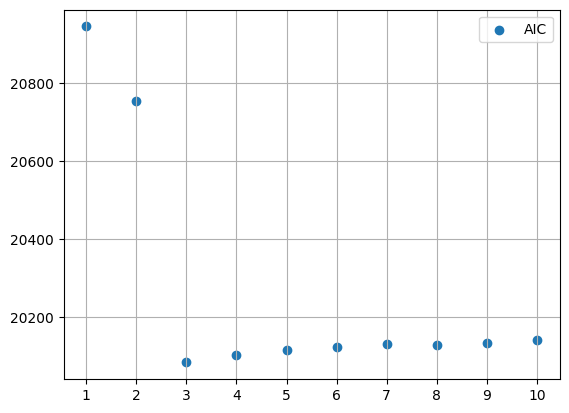

In [30]:
plt.scatter(range(1,11), AIC, label="AIC")
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

In [25]:
best_N=np.argmin(AIC)+1
print("The best model is with", best_N, "gaussians")

The best model is with 3 gaussians


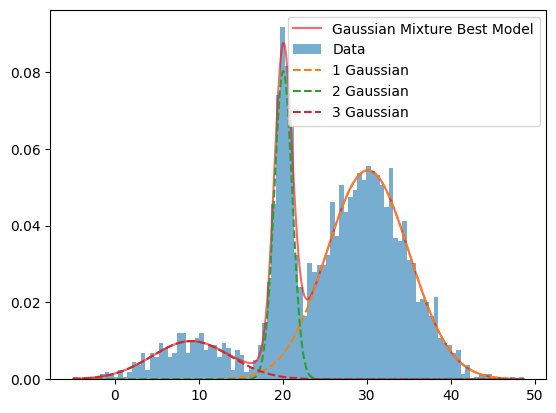

In [28]:
gm=GaussianMixture(n_components=best_N, random_state=0).fit(data)
x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
pdf = np.exp(gm.score_samples(x))
plt.plot(x.ravel(), pdf, '-r', label="Gaussian Mixture Best Model", alpha=0.6) 
plt.hist(data, bins=100, density=True, alpha=0.6, label="Data")

weights = gm.weights_
means = gm.means_.ravel()  
covariances = gm.covariances_.ravel()  

for i in range(3):  # Numero di componenti nel modello
    single_gauss = weights[i] * np.exp(-0.5 * ((x - means[i])**2 / covariances[i])) / np.sqrt(2 * np.pi * covariances[i])
    plt.plot(x.ravel(), single_gauss, '--', label=f"{i+1} Gaussian")

plt.legend()
plt.show()

The best model is with 3 gaussians


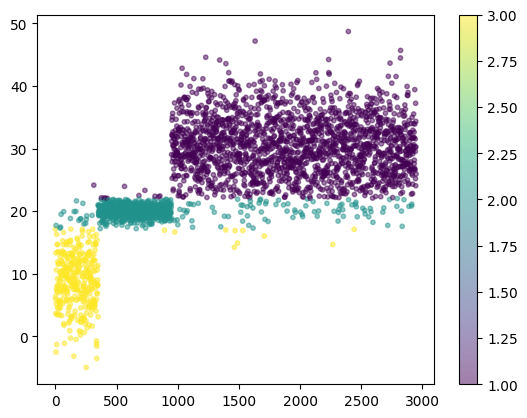

In [ ]:
gm=GaussianMixture(n_components=best_N, random_state=0)
gm.fit(data)
labels=gm.predict(data)

plt.scatter(range(len(data)),data,  c=labels+1 , cmap="viridis", s=10, alpha=0.5)
plt.colorbar()
plt.show()

